In [1]:
import numpy as np
import matplotlib.pyplot as plt

Text(0.5,1,'ERROR: 6.652496687005986')

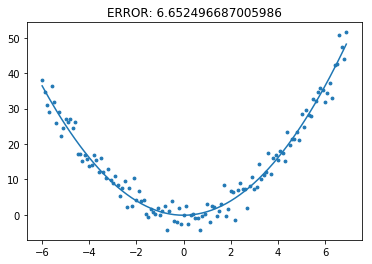

In [15]:
X_simple = np.arange(-6, 7, 0.1).reshape(-1, 1)
y_simple = [x**2 + np.random.normal(0,2.5) for x in X_simple]

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
m = LinearRegression()
m.fit(X_simple**2, y_simple)
ypred = m.predict(X_simple**2)

plt.figure()
plt.scatter(X_simple, y_simple, s=8) #here I'm plotting the data
plt.plot(X_simple, ypred) #here I'm plotting the regression line 
error = mean_squared_error(y_simple, ypred)
plt.title(f'ERROR: {error}')

In [17]:
import pandas as pd
df = pd.read_csv('../bike-sharing-demand/train.csv')

df['datetime'] = pd.to_datetime(df['datetime'])
df['month'] = df['datetime'].dt.month
df['year'] = df['datetime'].dt.year
df['day'] = df['datetime'].dt.day
df['hour'] = df['datetime'].dt.hour

Text(0.5,1,'SCORE: 0.44699454910542785')

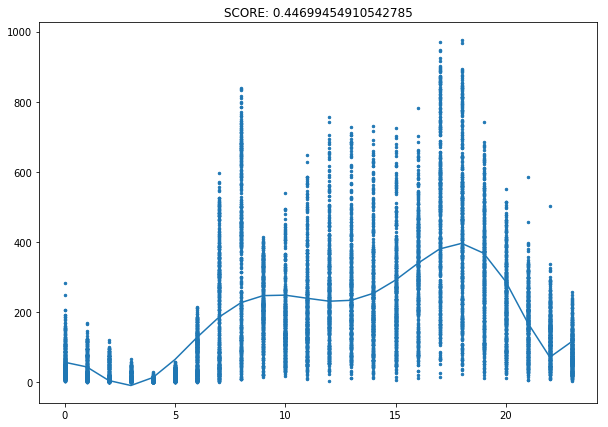

In [51]:
from sklearn.preprocessing import PolynomialFeatures

data = df.sort_values(by='hour')

poly = PolynomialFeatures(degree=7)
hour_poly = poly.fit_transform(data[['hour']])

m = LinearRegression()
m.fit(hour_poly, data['count'])

ypred = m.predict(hour_poly)

plt.figure(figsize=(10,7))
plt.scatter(data['hour'], data['count'], s=6)
plt.plot(data['hour'], ypred)
plt.title(f'SCORE: {m.score(hour_poly, data["count"])}')

In [45]:
poly.get_feature_names()

['1', 'x0', 'x0^2', 'x0^3', 'x0^4', 'x0^5', 'x0^6', 'x0^7']

In [46]:
m.coef_

array([ 0.00000000e+00,  2.97888668e+01, -6.41067839e+01,  2.43496071e+01,
       -3.60902830e+00,  2.56352952e-01, -8.73698142e-03,  1.14657948e-04])

Final prediction = 0*hour^0 + 29.7*hour^1 + (-6.41)*hour^2 + 24.3*hour^3 + ..... + 0.00014*hour^7

In [53]:
X = df.drop(['season', 'atemp', 'windspeed', 'casual', 'registered', 'weather', 'count', 'datetime', 'holiday'], axis=1)

In [54]:
y = df['count']

In [64]:
from sklearn.metrics import mean_squared_log_error

m = LinearRegression()
poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(X)

print(X.columns)
print(poly.get_feature_names())
print(len(poly.get_feature_names()))

m.fit(X_poly, np.log(y))
ypred_log = m.predict(X_poly)

print(f'RMSLE SCORE: {np.sqrt(mean_squared_log_error(y, np.exp(ypred_log)))}')

Index(['workingday', 'temp', 'humidity', 'month', 'year', 'day', 'hour'], dtype='object')
['1', 'x0', 'x1', 'x2', 'x3', 'x4', 'x5', 'x6', 'x0^2', 'x0 x1', 'x0 x2', 'x0 x3', 'x0 x4', 'x0 x5', 'x0 x6', 'x1^2', 'x1 x2', 'x1 x3', 'x1 x4', 'x1 x5', 'x1 x6', 'x2^2', 'x2 x3', 'x2 x4', 'x2 x5', 'x2 x6', 'x3^2', 'x3 x4', 'x3 x5', 'x3 x6', 'x4^2', 'x4 x5', 'x4 x6', 'x5^2', 'x5 x6', 'x6^2']
36
RMSLE SCORE: 0.8592055698525477
